<img src="media/Cryo+ESA_Logo_plain-50gray.svg" alt="CCI Cryosphere banner" width="1000"/>

# Mapping the permafrost active layer thickness

The Open Data Portal hosts three permafrost datasets you can find here [permafrost active layer thickness](https://climate.esa.int/en/odp/#/project/permafrost). This exercise will show you how to visualize and process these datasets.

## Preparations
If you haven't done so please follow the [Cate tutorial](https://www.futurelearn.com/courses/understanding-climate-change-using-satellite-climate-data/1/steps/1230976) to get started using the Jupyter notebook exercises.

## Cate software and the open data portal

We'll be querying the open data portal for sea ice concentration products as produced by the [Climate Change Initiative Sea Ice project](https://climate.esa.int/en/projects/sea-ice/). The [**open data portal**](https://climate.esa.int/en/odp/#/dashboard) hosts a variety of datasets on the [Jasmin infrastructure on the UK](https://jasmin.ac.uk/). These can be queried using the dedicated [Cate python module](https://cate.readthedocs.io/en/latest/). Cate allows retrieving data from the data portal and the web-interface which you find at [cate.climate.esa.int](https://cate.climate.esa.int) is build upon it.

In this Jupyter notebook exercise we will directly call Cate functions, and it will show you how these can be used in advanced workflows.

## Starting the exercise
To perform the exercise and execute the code in this notebook you can run it through the [mybinder.org](https://mybinder.org/) service by clicking on the binder link below (if resources allow it). Alternatively, you can download/clone the notebooks from [github](https://github.com/CCI-Tools/cate-edu) and run them through your own Jupyter notebook instance (this may initially take more time to setup, but does allow you to store your changes and extend the notebooks exercises to your own needs).

[![click to run this notebook on mybinder.org](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/CCI-Tools/cate-edu/HEAD?filepath=ECVs%2F07_Permafrost-exercise.ipynb)

or [clone the notebook repository on github](https://github.com/CCI-Tools/cate-edu)

## Step 1: loading python modules and initialize the data store pool

In [1]:
# To get things started we need to initialize a few things
#Load some python modules to make them accessible to the notebook
from cate.core.ds import DATA_STORE_POOL
import cate.ops as ops
from cate.core.ds import get_metadata_from_descriptor
from cate.ops.io import open_dataset

# the following is needed to run Cate in a Jupyter Notebook
from xcube.util.ipython import enable_asyncio
enable_asyncio()

# utilities
from IPython.display import display
import numpy as np
from datetime import datetime

To begin, let us see which data stores are available in the Data Store Pool.

In [2]:
DATA_STORE_POOL.store_instance_ids

['cci-store', 'cci-zarr-store', 'local']

We see three different stores. 

The **cci-store** is a store that provides access to all datasets from the CCI Open Data Portal. It connects to the Open Data Portal and allows access to the datasets listed at https://catalogue.ceda.ac.uk. We can ask for the search parameters of the store to see how a search can be performed.

The **cci-zarr-store** is a store that contains selected data from the Open Data Portal, converted to the [zarr format](https://zarr.readthedocs.io/en/stable/). The datasets from this store can be opened and processed faster, but the store provides only a small subset of what is offered by the **cci-store**. 

The **local** data store finally allows to access locally provided data. Also, when you select to cache data, you will find it in this store. Cached data can also be opened quickly.

This notebook will allow you to try out both the *cci-zarr-store* and the *cci-store*. Just uncomment/comment the appropriate `cci_store` variable below.

In [3]:
# uncomment/comment the cci_store variable below to use the 
# cci_store='cci-zarr-store'
cci_store = 'cci-store'

data_store = DATA_STORE_POOL.get_store(cci_store)
display(data_store.get_search_params_schema())

if cci_store == 'cci-zarr-store':
    #you can also list all the data ids of the smaller zarr catalogue
    list(data_store.get_data_ids())

## Step 2: Finding Permafrost data
For this exercise, we are interested in Permafrost data sets, so we ask for datasets of the ecv "PERMAFROST". We then display the results of the query.

In [4]:
# To get an idea of what is available in the online data portal one can query it and loop over it's result to print some information to the screen
permafqry = data_store.search_data(ecv="PERMAFROST")

for i,pfItem in enumerate(permafqry):
    print(f'\nDataset item {i}:')
    display(pfItem)


Dataset item 0:



Dataset item 1:



Dataset item 2:



Dataset item 3:



Dataset item 4:



Dataset item 5:


Of these, we pick the multi sensor bias corrected dataset and open it. The parameter 'data_store_id' is not absolutely necessary, but it makes the opening a little faster. The parameter 'normalize' should be used so that the dataset is preprocessed in a way that it can be optimally used in Cate.

In [5]:
#note the appropriate dataset is called slightly different depending on the cci-store which is being used
if cci_store == 'cci-store':
    dataset_id = "esacci.PERMAFROST.yr.L4.ALT.multi-sensor.multi-platform.ERA5_MODISLST_BIASCORRECTED.03-0.r1"
elif cci_store == "cci-zarr-store":
    dataset_id = "ESACCI-PERMAFROST-L4-ALT-MODISLST-AREA4_PP-1997-2018-fv02.0.zarr"

#describe the dataset
data_descriptor = data_store.describe_data(dataset_id)
display(data_descriptor)

In [6]:
permaALTDset = open_dataset(ds_id=dataset_id, data_store_id=cci_store, normalize=True)

/home/alicja/miniconda3/envs/cate-env/lib/python3.9/site-packages/xcube_cci/dataaccess.py:286: RuntimeWarning: Failed to open Zarr store with consolidated metadata, falling back to try reading non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  ds = xr.open_zarr(chunk_store)


## Step 3: Visualization of the active layer thickness
Now that we have opened the data set, we can visualize it so we can learn on where permafrost occurs

Text(0.5, 1.0, 'Permafrost active layer thickness in the Northern hemisphere')

/home/alicja/miniconda3/envs/cate-env/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/alicja/miniconda3/envs/cate-env/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/alicja/miniconda3/envs/cate-env/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/home/alicja/miniconda3/envs

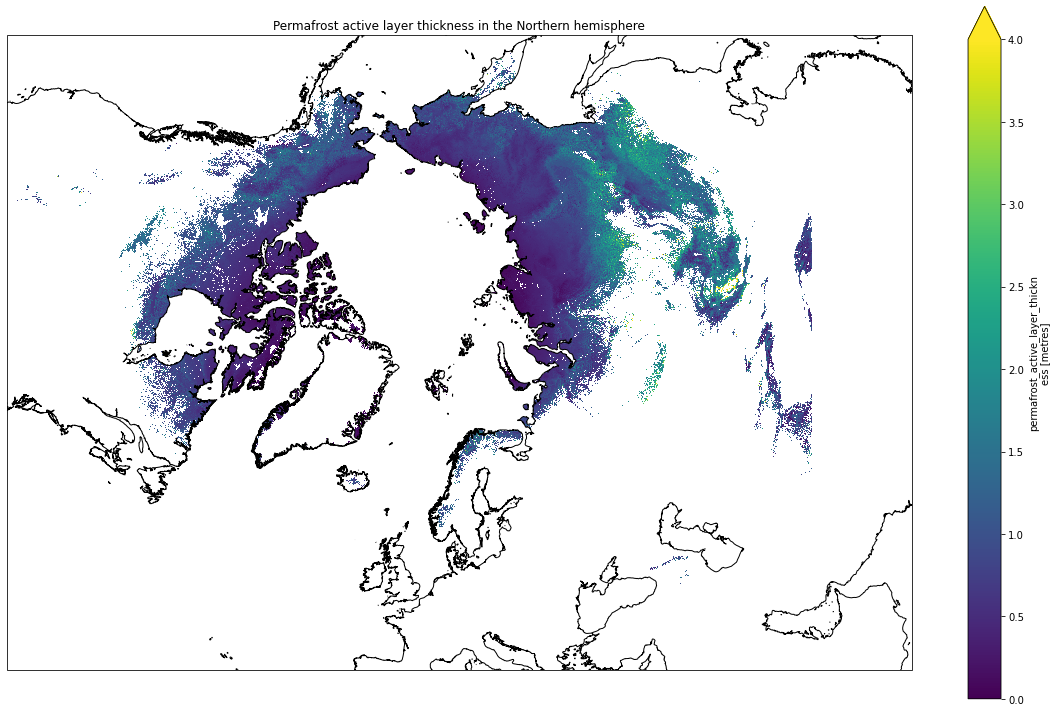

In [7]:
%matplotlib inline
import matplotlib.pyplot as mpl
import cartopy.crs as ccrs

it = 0

mpl.figure(figsize=(16, 10))
crs = ccrs.NorthPolarStereo(0, true_scale_latitude=71)

ax = mpl.subplot(projection=crs)
permaALTDset.ALT[it,:,:].plot.imshow(vmin=0, vmax=4, ax=ax)

ax.coastlines(resolution='10m')

ax.set_title("Permafrost active layer thickness in the Northern hemisphere")


## Questions (share your answers on the forum and discuss)
Now that you've done the exercise, you can try to tweak some settings to get further insights in permafrost changes.
1. In general, higher latitudes are associated with a thinner active layer. How can you explain this?
2. Copy the plotting code in a new cell and try to make a plot of the change in active layer thickness (difference between last and first epoch). Make sure to choose a divergent colormap (e.g. seismic centered at a value of zero)
3. Is there a general decrease or increase of the active layer thickness? Would this be expected under a warming climate?